In [109]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [111]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [113]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

In [115]:
train_data = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_data = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

In [117]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [119]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(2),                             
            nn.Conv2d(16, 32, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(2)                              
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

In [121]:
model = CNN().to(device)

In [123]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [125]:
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

Epoch 1/10 - Loss: 0.1657
Epoch 2/10 - Loss: 0.0477
Epoch 3/10 - Loss: 0.0340
Epoch 4/10 - Loss: 0.0249
Epoch 5/10 - Loss: 0.0192
Epoch 6/10 - Loss: 0.0152
Epoch 7/10 - Loss: 0.0119
Epoch 8/10 - Loss: 0.0108
Epoch 9/10 - Loss: 0.0106
Epoch 10/10 - Loss: 0.0064


In [126]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"\n Test Accuracy: {accuracy:.2f}%")
print("예측값들:", predicted[:10].cpu().numpy())


 Test Accuracy: 99.02%
예측값들: [1 2 3 4 5 6 7 8 9 0]


In [127]:
import matplotlib.pyplot as plt

model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

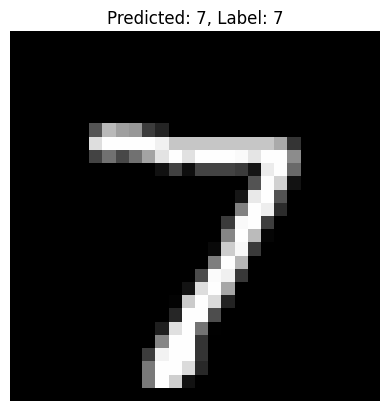

In [128]:
plt.imshow(images[0].cpu().squeeze(), cmap='gray')
plt.title(f"Predicted: {preds[0].item()}, Label: {labels[0].item()}")
plt.axis('off')
plt.show()